In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar,warnings,itertools,matplotlib,keras,shutil
import tensorflow as tf
import statsmodels.api as sm
from datetime import datetime

Using TensorFlow backend.


In [9]:
#Hiding the warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing Dataset using pandas
dataset=pd.read_csv("DataCoSupplyChainDataset.csv",encoding= 'unicode_escape',header=0)
dataset.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [10]:
dataset.shape

(180519, 54)

In [11]:
#Check for missing values
dataset.apply(lambda x: sum(x.isnull()))

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [12]:
# There are some missing values in Lname. But we can merge First name and Last name.

dataset['Customer Name'] = dataset['Customer Fname'] + dataset['Customer Lname']

In [13]:
#Remove unwanted columns.

data=dataset.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Latitude','Longitude','Product Description','Product Image','Order Zipcode','shipping date (DateOrders)'],axis=1)
data.shape

(180519, 42)

In [14]:
#Fill missing values in '''Customer Zipcode''' with 0

data['Customer Zipcode']= data['Customer Zipcode'].fillna(0)

Finding correlation of the variables

In [15]:
corrmap = data.corr()
corrmap.index

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Late_delivery_risk',
       'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id',
       'Order Customer Id', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Product Card Id', 'Product Category Id',
       'Product Price'],
      dtype='object')

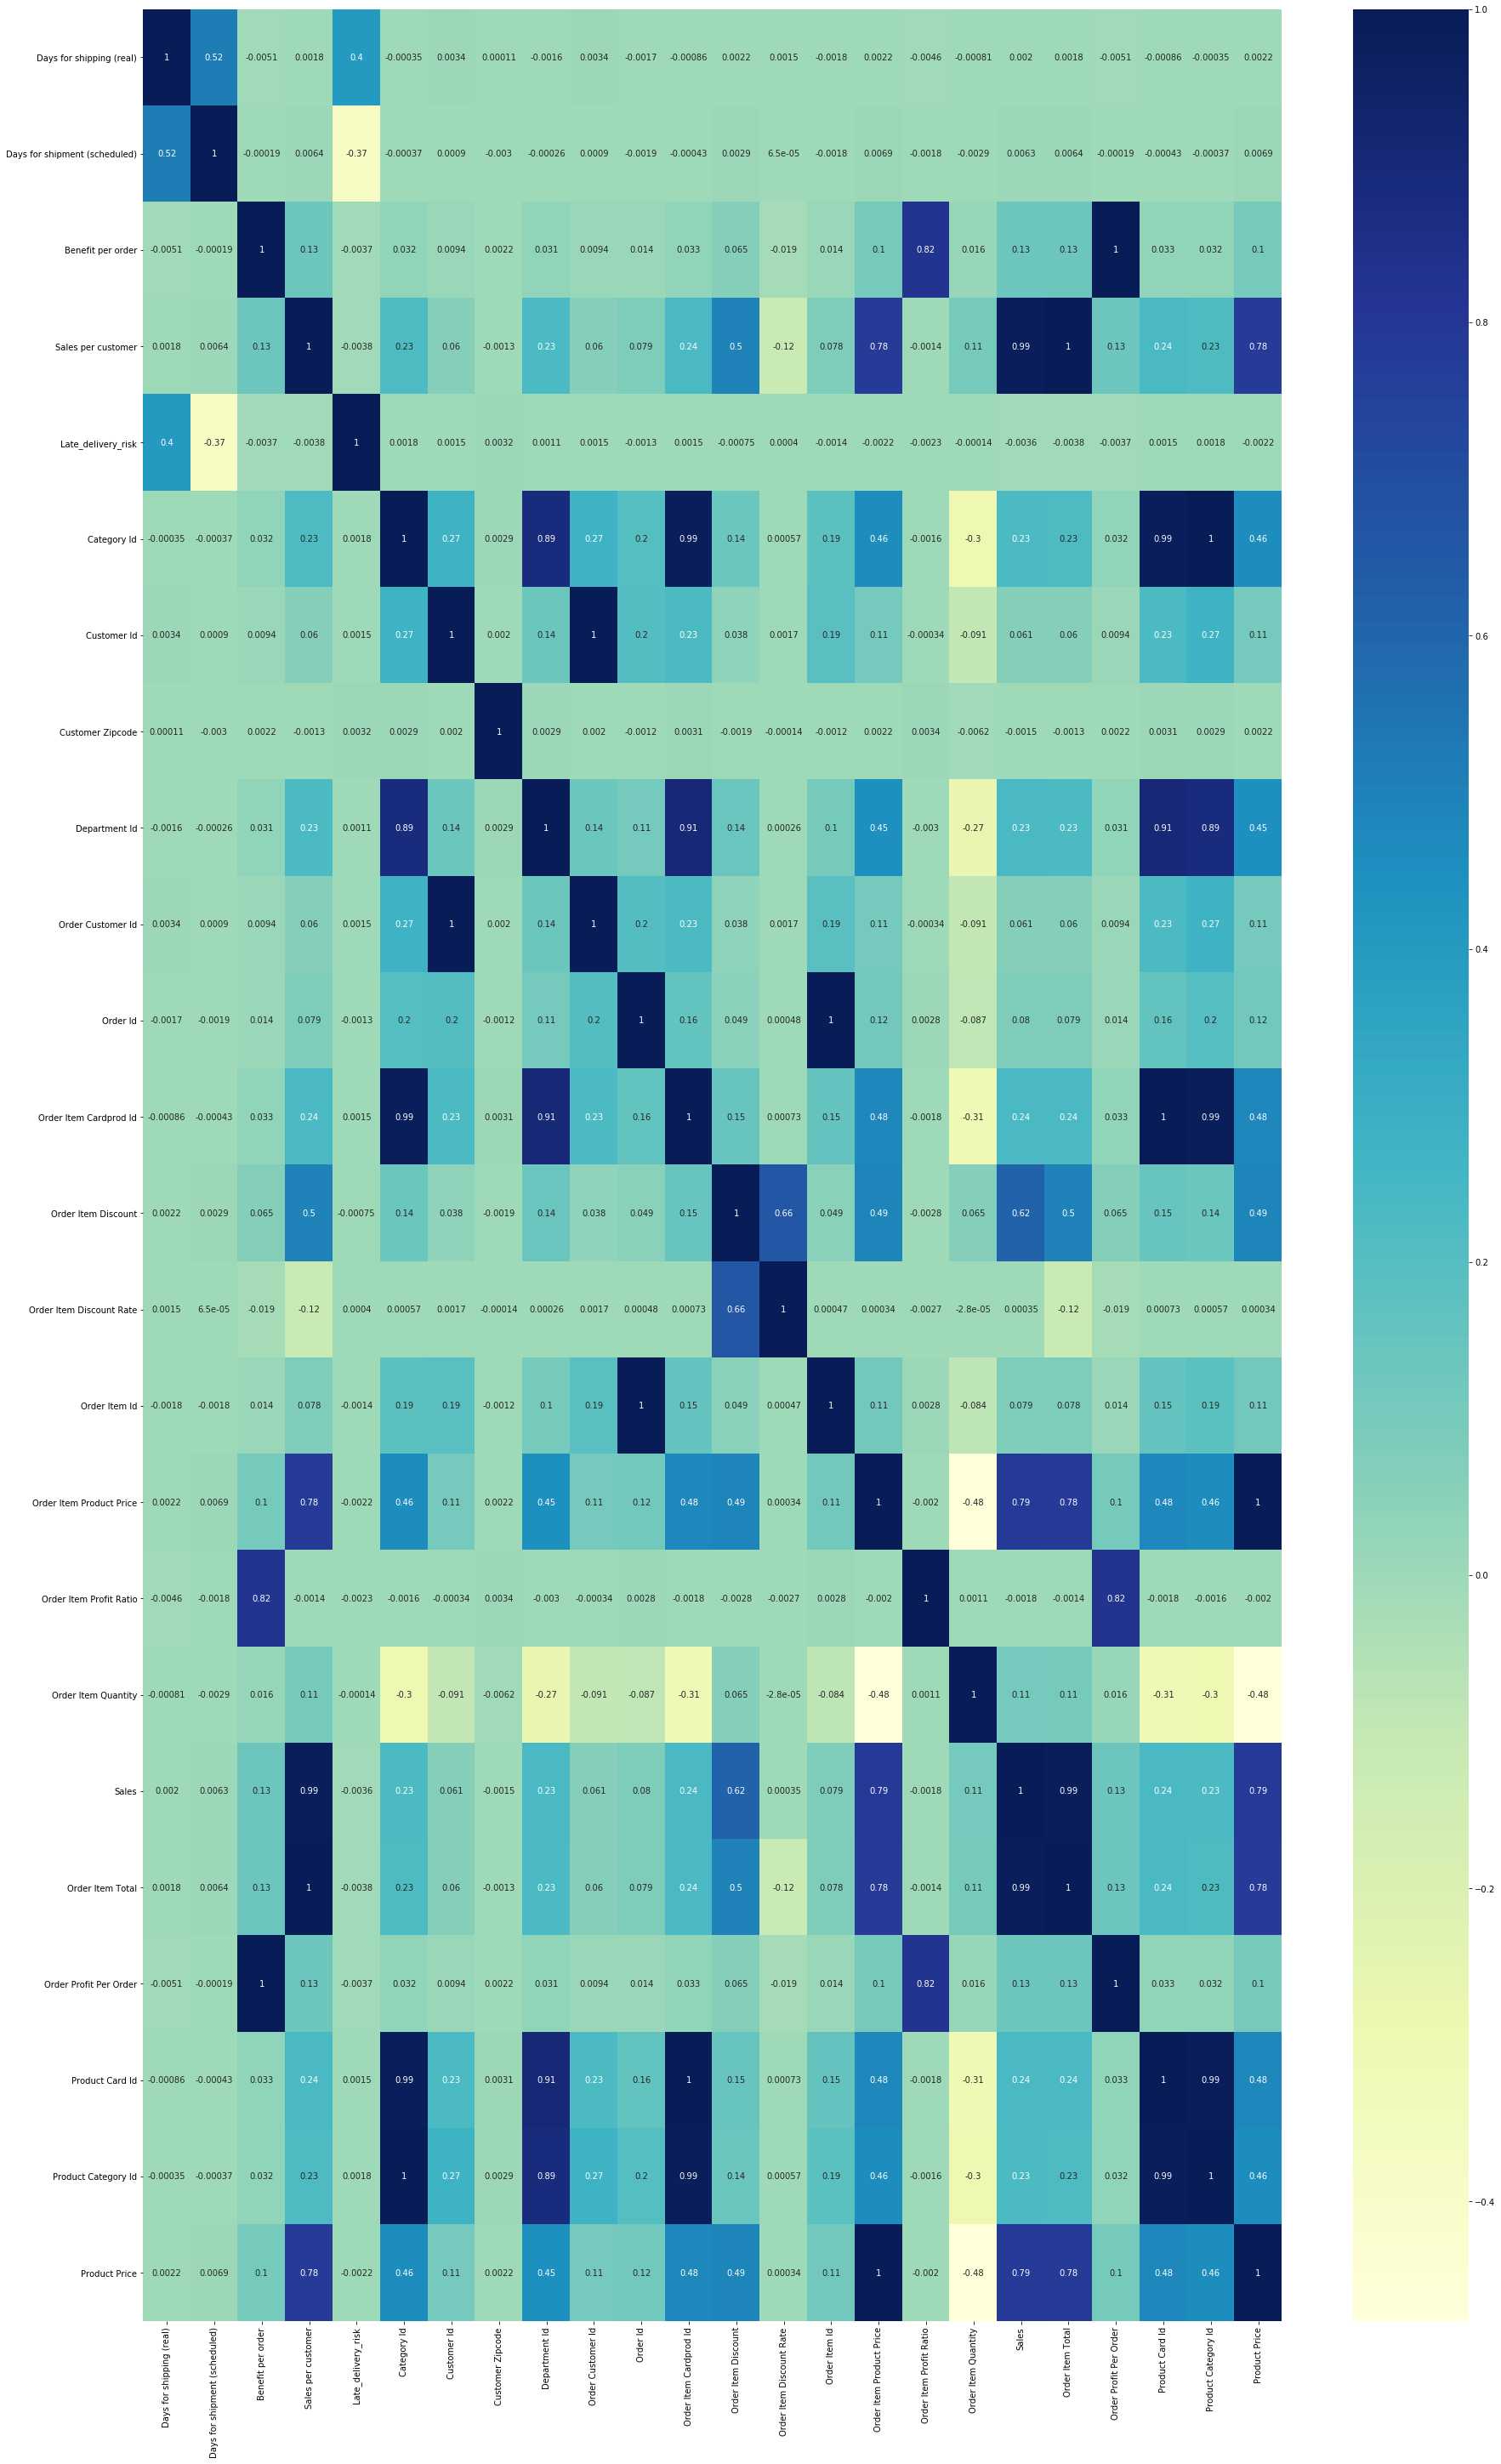

In [16]:
#Heatmap provides the data of how the variables are correlated to each other.

cor_index=corrmap.index
plt.figure(figsize=(30,50))
sns.heatmap(data[cor_index].corr(),annot=True,cmap="YlGnBu")

We will find which region has most sales. We can observe that the <b>Europe market</b> produces highest sales and within Europe, <b> Western Europe </b> produces highest sales.

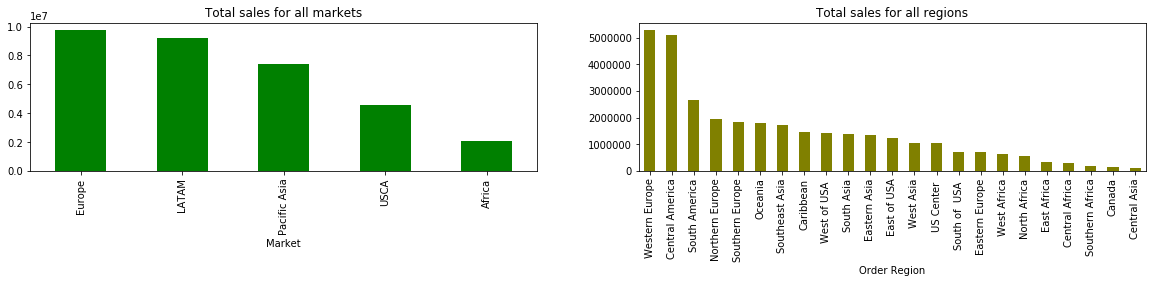

In [17]:
market = data.groupby('Market')
region = data.groupby('Order Region')

plt.subplot(2, 2, 1)
market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(20,6), title="Total sales for all markets",color='green')
plt.subplot(2, 2, 2)
region['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(20,6), title="Total sales for all regions",color='olive')

Next we will see which category produces highest sales. <b>Fishing</b> category produces the highest sales.

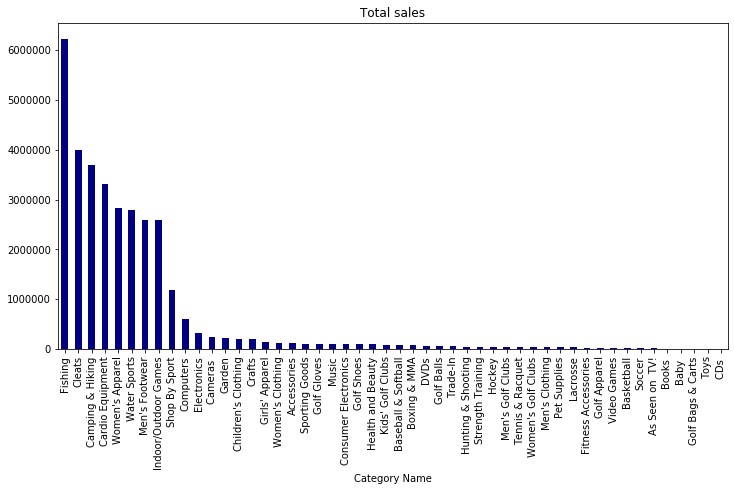

In [18]:
cat = data.groupby('Category Name')
plt.figure(1)
cat['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales",color='navy')

Here we can see the <b>Product price</b> is in <b>linear relation</b> with <b>Sales per customer</b>. As Product price increases, the Sales per customer increases.

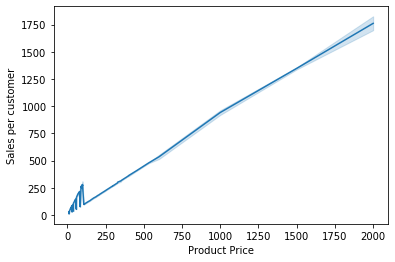

In [19]:
sns.lineplot(x='Product Price',y='Sales per customer',data = data)

By seeing below graph it can be seen that sales are consistent from Q1 2015 until Q3 of 2017 and suddenly dipped by Q1 2018. 

In [20]:
data['order_year']= pd.DatetimeIndex(data['order date (DateOrders)']).year
data['order_month'] = pd.DatetimeIndex(data['order date (DateOrders)']).month
data['order_hour'] = pd.DatetimeIndex(data['order date (DateOrders)']).hour
data['order_week_day'] = pd.DatetimeIndex(data['order date (DateOrders)']).weekday
data['order_month_year'] = pd.to_datetime(data['order date (DateOrders)']).dt.to_period('M')

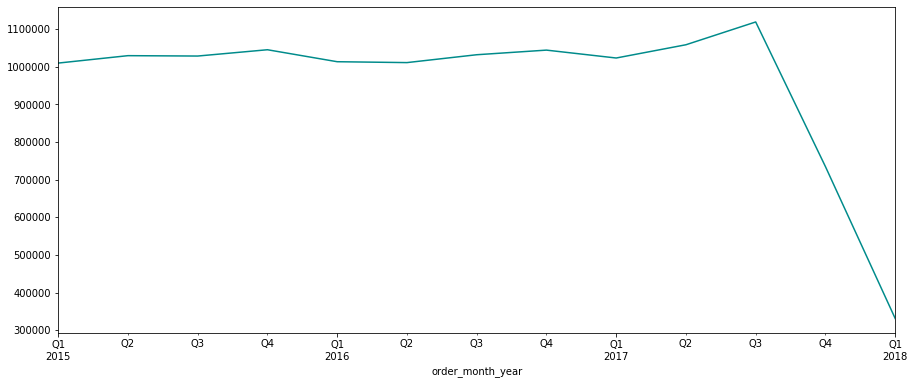

In [21]:
quater= data.groupby('order_month_year')
quartersales=quater['Sales'].sum().resample('Q').mean().plot(figsize=(15,6),color='darkcyan')

From the below plot we can say that the sales hit the peak during <b>October</b> and on <b>Saturday</b> in a week.

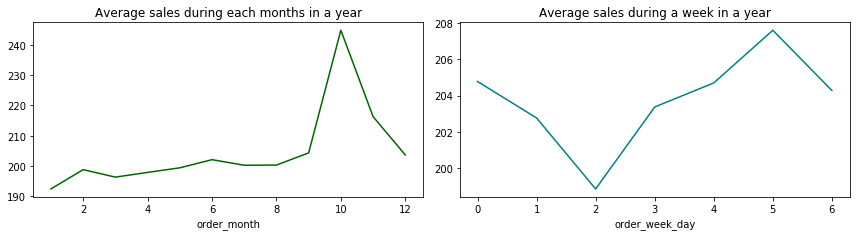

In [22]:
plt.figure(figsize=(10,12))
plt.subplot(4, 2, 2)
week= data.groupby('order_week_day')
week['Sales'].mean().plot(figsize=(12,12),title='Average sales during a week in a year',color = 'teal')

plt.subplot(4, 2, 1)
mnth=data.groupby("order_month")
mnth['Sales'].mean().plot(figsize=(12,12),title='Average sales during each months in a year',color = 'darkgreen')
plt.tight_layout()
plt.show()

Lets know what type of payment method is being preferred by people.

In [91]:
data['Type'].unique()

array(['DEBIT', 'TRANSFER', 'CASH', 'PAYMENT'], dtype=object)

Below Bar plot shows that how payment method are used in different region. <b>Debit payment</b> is used most in all the region and <b>Cash payment</b> is least used.

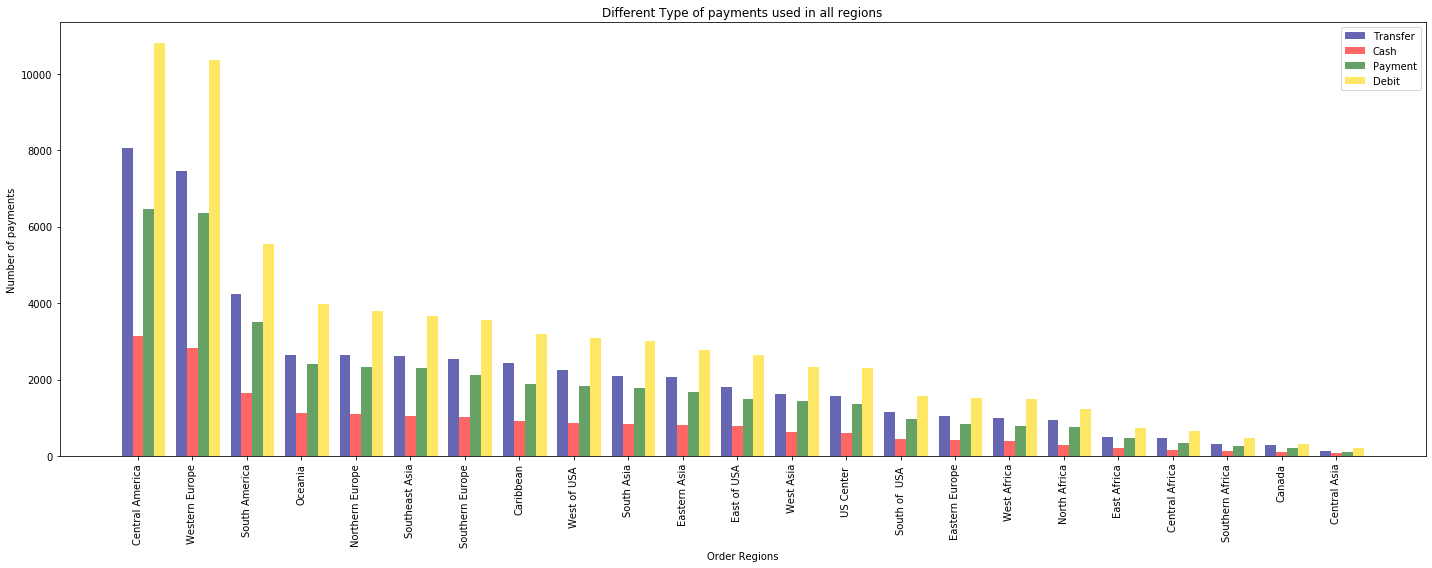

In [106]:
#xyz = data.groupby('Type')
Transfer = data[(data['Type'] == 'TRANSFER')]
Cash= data[(data['Type'] == 'CASH')]
Payment= data[(data['Type'] == 'PAYMENT')]
Debit= data[(data['Type'] == 'DEBIT')]
count1=Transfer['Order Region'].value_counts()
count2=Cash['Order Region'].value_counts()
count3=Payment['Order Region'].value_counts()
count4=Debit['Order Region'].value_counts()
names=data['Order Region'].value_counts().keys()
n_groups=23
fig,ax = plt.subplots(figsize=(20,8))
index=np.arange(n_groups)
bar_width=0.2
opacity=0.6
type1=plt.bar(index,count1,bar_width,alpha=opacity,color='navy',label='Transfer')
type2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='red',label='Cash')
type3=plt.bar(index+bar_width+bar_width,count3,bar_width,alpha=opacity,color='darkgreen',label='Payment')
type4=plt.bar(index+bar_width+bar_width+bar_width,count4,bar_width,alpha=opacity,color='gold',label='Debit')
plt.xlabel('Order Regions')
plt.ylabel('Number of payments')
plt.title('Different Type of payments used in all regions')
plt.legend()
plt.xticks(index+bar_width,names,rotation=90)
plt.tight_layout()
plt.show()

Product wise, <b>Cleats</b> have the most loss and, region wise <b>Central America</b> has most loss.

Total revenue lost with orders -3883547.345768667


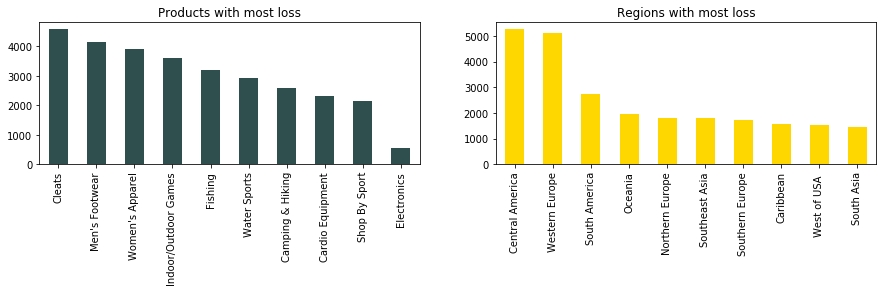

In [114]:
loss = data[(data['Benefit per order']<0)]
plt.subplot(4, 2, 1)
loss['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(15,12), title="Products with most loss",color='darkslategrey')
plt.subplot(4, 2, 2)
loss['Order Region'].value_counts().nlargest(10).plot.bar(figsize=(15,12), title="Regions with most loss",color='gold')
print('Total revenue lost with orders',loss['Benefit per order'].sum())

<b>Loss</b> can be because of many reason. Lets analyse if <b>Delay in Delivery</b> can be a reason. Below plot of Delay in Delivery in each department correlate directly with product loss.

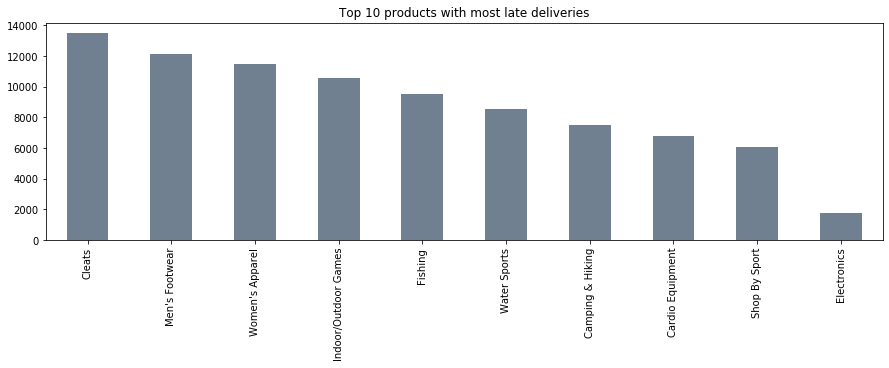

In [161]:
late_delivery = data[(data['Delivery Status'] == 'Late delivery')]
late_delivery['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(15,4), title="Top 10 products with most late deliveries",color='slategrey')

We can see how Company is facing <b>Fraud</b> with respect to Market, Region, Countries and Cities.

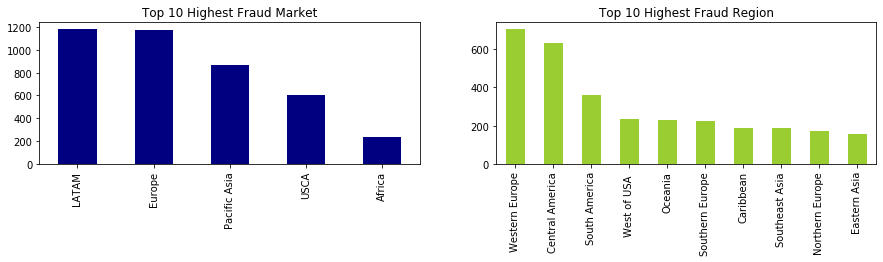

In [153]:
fraud = data[(data['Order Status'] == 'SUSPECTED_FRAUD')] 
plt.subplot(4, 2, 2)
fraud['Order Region'].value_counts().nlargest(10).plot.bar(figsize=(15,12), title="Top 10 Highest Fraud Region",color='yellowgreen')
plt.subplot(4, 2, 1)
fraud['Market'].value_counts().nlargest(10).plot.bar(figsize=(15,12), title="Top 10 Highest Fraud Market",color = 'navy')

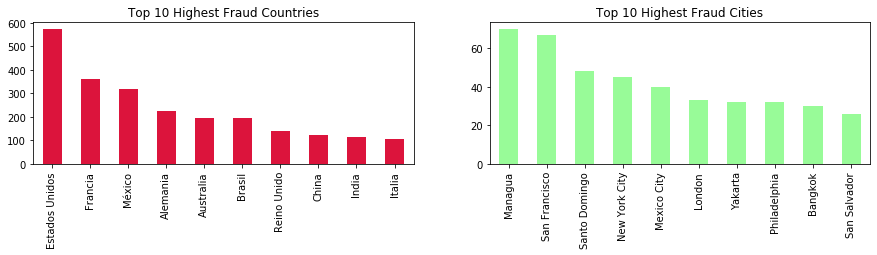

In [152]:
fraud = data[(data['Order Status'] == 'SUSPECTED_FRAUD')] 
plt.subplot(4, 2, 2)
fraud['Order City'].value_counts().nlargest(10).plot.bar(figsize=(15,12), title="Top 10 Highest Fraud Cities",color='palegreen')
plt.subplot(4, 2, 1)
fraud['Order Country'].value_counts().nlargest(10).plot.bar(figsize=(15,12), title="Top 10 Highest Fraud Countries",color='crimson')

# Customer Segmentation

Understanding customer needs and targeting specific clusters of customers based on their need is one way for a supply chain company to increase number of customers and also to gain more profits.Since,purchase history of customers is already avaialble in the dataset, it can use <b>RFM analysis</b> for customer segmention. 

In [183]:
data['TotalPrice'] = data['Order Item Quantity'] * data['Order Item Total']

In [181]:
data['order date Timestamp']=pd.to_datetime(data['order date (DateOrders)'])

In [184]:
data['order date'] = data['order date Timestamp'].dt.date

In [191]:
sorted(data['order date'],reverse=True)[0]

datetime.date(2018, 1, 31)

In [192]:
#Present date was set to next day of the last order. i.e,2018-02-01
present = dt.datetime(2018,2,1)
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

In [194]:
# Grouping all values into new data frame named customer segmentation
Customer_seg = data.groupby('Order Customer Id').agg({'order date (DateOrders)': lambda x: (present - x.max()).days
                                                      , 'Order Id': lambda x: len(x)
                                                      , 'TotalPrice': lambda x: x.sum()})
#Changing order dates to int format
Customer_seg['order date (DateOrders)'] = Customer_seg['order date (DateOrders)'].astype(int)
# Renaming columns as R_Value,F_Value,M_Value
Customer_seg.rename(columns={'order date (DateOrders)': 'R_Value', 
                         'Order Id': 'F_Value', 
                         'TotalPrice': 'M_Value'}, inplace=True)
Customer_seg.head()

,R_Value,F_Value,M_Value
Order Customer Id,,,
1,792,1,2362.250061
2,136,10,2842.700073
3,229,18,6143.760057
4,380,14,4370.629991
5,457,7,2993.790032


<b>R_Value(Recency)</b> -> indicates how much time elapsed since a customer last order.

<b>F_Value(Frequency)</b> -> indicates how many times a customer ordered.

<b>M_Value(Monetary value)</b> -> tells us how much a customer has spent purchasing items.

The total data is divided into 4 quantiles. The R_Value should be low because it indicates recent customer activity and F_value, M_Value should be high since they indicate frequency and total value of purchase. Function is defined to indicate quantiles as numerical values.

In [197]:
quantiles = Customer_seg.quantile(q=[0.25,0.5,0.75]) #Dividing RFM data into four quartiles
quantiles = quantiles.to_dict() 

In [198]:
quantiles

{'R_Value': {0.25: 75.0, 0.5: 159.0, 0.75: 307.0},
 'F_Value': {0.25: 1.0, 0.5: 7.0, 0.75: 15.0},
 'M_Value': {0.25: 258.0400085, 0.5: 2573.794999195, 0.75: 6003.142553865}}

In [195]:
# R_Score should be minimum so 1st quantile is set as 1.
def R_Score(a,b,c):
    if a <= c[b][0.25]:
        return 1
    elif a <= c[b][0.50]:
        return 2
    elif a <= c[b][0.75]: 
        return 3
    else:
        return 4
# The higher the F_Score,M_Score the better so 1st quantile is set as 4.    
def FM_Score(x,y,z):
    if x <= z[y][0.25]:
        return 4
    elif x <= z[y][0.50]:
        return 3
    elif x <= z[y][0.75]: 
        return 2
    else:
        return 1

In [199]:
# New column for R_Score to indicate numerical score between 1 to 4.
Customer_seg['R_Score'] = Customer_seg['R_Value'].apply(R_Score, args=('R_Value',quantiles))
# New column for F_Score to indicate numerical score between 1 to 4.
Customer_seg['F_Score'] = Customer_seg['F_Value'].apply(FM_Score, args=('F_Value',quantiles))
# New column for M_Score to indicate numerical score between 1 to 4.
Customer_seg['M_Score'] = Customer_seg['M_Value'].apply(FM_Score, args=('M_Value',quantiles))
Customer_seg.head()

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score
Order Customer Id,,,,,,
1,792,1,2362.250061,4,4,3
2,136,10,2842.700073,2,2,2
3,229,18,6143.760057,3,1,1
4,380,14,4370.629991,4,2,2
5,457,7,2993.790032,4,3,2


In [200]:
# Calculate RFM_Score
Customer_seg['RFM_Total_Score'] = Customer_seg[['R_Score','F_Score','M_Score']].sum(axis=1)
Customer_seg['RFM_Total_Score'].unique()

array([11,  6,  5,  8,  9,  7,  4, 10, 12], dtype=int64)

In [201]:
def RFM_Total_Score(df):

    if (df['RFM_Total_Score'] >= 11):# For RFM score with values 11,12
        return 'Champions' 
    elif (df['RFM_Total_Score'] == 10):# For RFM score with value 10
        return 'Loyal Customers' 
    elif (df['RFM_Total_Score'] == 9): # For RFM score with value 9
        return 'Recent Customers'
    elif (df['RFM_Total_Score'] == 8): # For RFM score with value 8
         return 'Promising'
    elif (df['RFM_Total_Score'] == 7): # For RFM score with value 7
        return 'Customers Needing Attention'
    elif (df['RFM_Total_Score'] == 6): # For RFM score with value 6
        return 'Cant lose them'
    elif (df['RFM_Total_Score'] == 5): # For RFM score with value 5
        return 'At Risk'
    else:                               # For RFM score with value less than 5
        
        return 'Lost'
# Create a new variable RFM_Level
Customer_seg['Customer_Segmentation'] =Customer_seg.apply(RFM_Total_Score, axis=1)
# Print the header with top 5 rows to the console
Customer_seg.head()

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Total_Score,Customer_Segmentation
Order Customer Id,,,,,,,,
1,792,1,2362.250061,4,4,3,11,Champions
2,136,10,2842.700073,2,2,2,6,Cant lose them
3,229,18,6143.760057,3,1,1,5,At Risk
4,380,14,4370.629991,4,2,2,8,Promising
5,457,7,2993.790032,4,3,2,9,Recent Customers


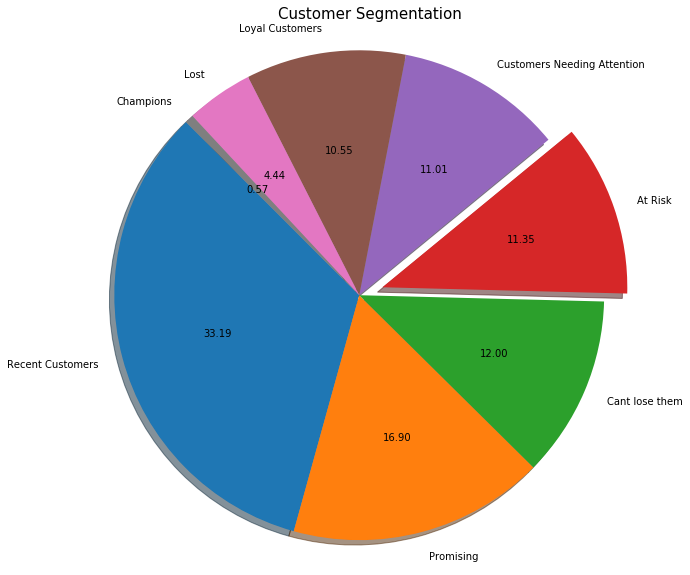

In [206]:
Customer_seg['Customer_Segmentation'].value_counts().plot.pie(figsize=(10,10),
                                        startangle=135, explode=(0,0,0,0.1,0,0,0,0),autopct='%.2f',shadow=True)
plt.title("Customer Segmentation",size=15)
plt.ylabel(" ")
plt.axis('equal') 
plt.show()